Decision Tree Accuracy: 0.9630
Bagging Accuracy: 0.9630

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


Bagging Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



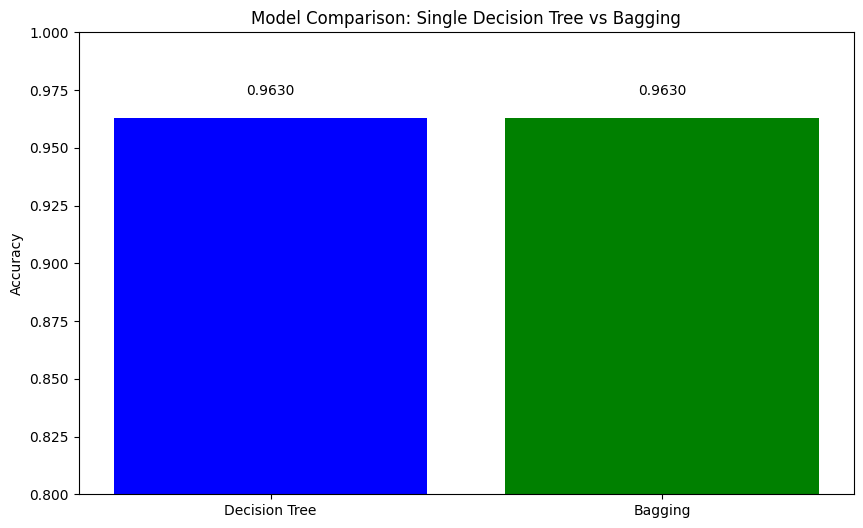

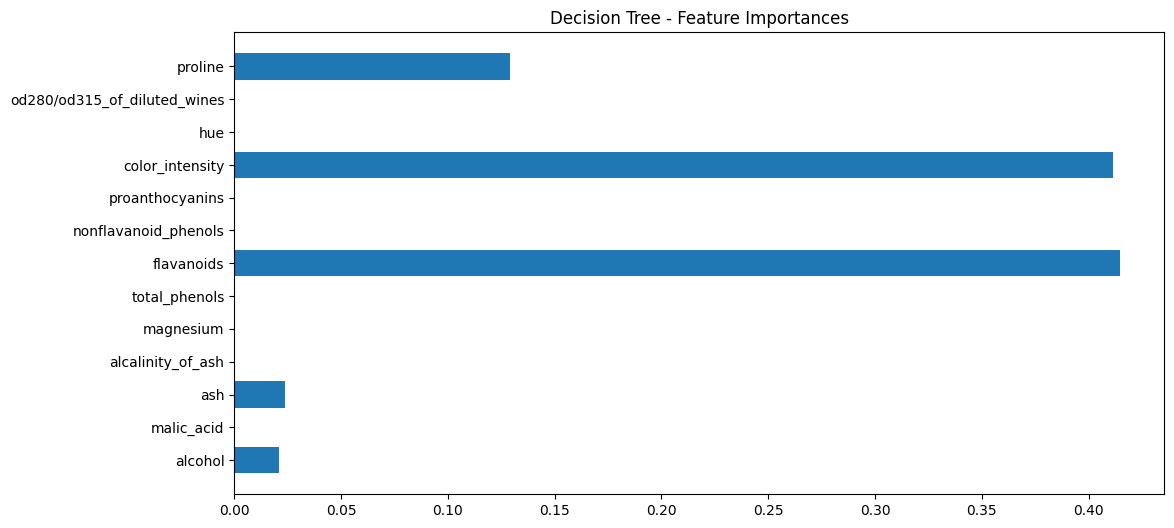

In [4]:
# Bagging Classifier Demonstration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Base model - Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Bagging model
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    random_state=42
)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)

# Compare performance
print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Bagging Accuracy: {bagging_acc:.4f}")

# Classification reports
print("\nDecision Tree Report:")
print(classification_report(y_test, dt_pred))

print("\nBagging Report:")
print(classification_report(y_test, bagging_pred))

# Visual comparison
plt.figure(figsize=(10, 6))
models = ['Decision Tree', 'Bagging']
accuracies = [dt_acc, bagging_acc]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Comparison: Single Decision Tree vs Bagging')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.savefig('performance_comparison.png')
plt.show()

# Feature importance analysis (for Decision Tree)
plt.figure(figsize=(12, 6))
plt.barh(data.feature_names, dt.feature_importances_)
plt.title('Decision Tree - Feature Importances')
plt.savefig('feature_importance.png')
plt.show()